## 1

Первая камера повернута относительно второй на 45 градусов по оси z и сдвинута
на 10 по оси x (в системе отсчета, связанной с первой камерой). У обоих камер
матрицы внутренних параметров единичные. Найти фундаментальную матрицу.

Запишем формулу фундаментальной матрицы:
F = [T]xR

Векторное произведение двух векторов в координатах в правом ортонормированном базисе можно записать как произведение кососимметрической матрицы и вектора: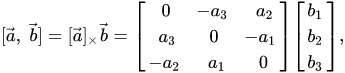

In [24]:

import cv2
import numpy as np


a = np.deg2rad(45)

R =  np.array([[np.cos(a),   -np.sin(a),   0],
      [np.sin(a),   np.cos(a),   0],
      [0, 0,  1]])

In [25]:
T = np.array([[0, 0,   0],
     [0, 0, -10],
     [0, 10,  0]])

Вычислим F пл формуле:

In [26]:
F_task1 = np.matmul(T, R)

In [27]:
print('F = ', F_task1)

F =  [[  0.           0.           0.        ]
 [  0.           0.         -10.        ]
 [  7.07106781   7.07106781   0.        ]]


# 2

Первая камера повернута относительно мировой системы координат на 45
градусов по оси z, а вторая – на -45 градусов по оси у и сдвинута на 10 по оси x. У
обоих камер матрицы внутренних параметров единичные. Найти
фундаментальную матрицу

Воспользуемся следующими формулами:
$$F=[e^{'}]_{x}P_{2}P_{1}^{+}$$
$$e^{'} = P_{2}O$$
$$O_{1} = (0,0,0) + T_{1}$$

In [16]:
a1 = np.deg2rad(45)
a2 = np.deg2rad(-45)

R1 =[[np.cos(a1),   -np.sin(a1),   0],
      [np.sin(a1),   np.cos(a1),   0],
      [0,               0,               1]]
R2 =[[np.cos(a2),0,np.sin(a2)],
      [0,1,0],
      [-np.sin(a2),0,np.cos(a2)]]

T1 = np.array([[0, 0, 0]]).T
T2 = np.array([[10, 0, 0]]).T


P1 = np.concatenate((R1, T1), axis=1)
P2 = np.concatenate((R2, T2), axis=1)

Найдем обратную матрицу для P1:

In [20]:
P1_plus = np.linalg.pinv(P1)

Найдем e'

In [21]:

O1 = np.array([[0, 0, 0]]).T + T1
e = np.matmul(P2,np.append(O1, np.array([1])))

воспользуемся предствалением е в качестве кососимметрической матрицы:

In [22]:
e = np.array([[ 0, -e[2],  e[1]  ],
       [ e[2], 0, -e[0] ],
       [-e[1],  e[0], 0] ])


Находим фундоментальную  матрицу:

In [23]:
tmp = np.matmul(e, P2)
F = np.matmul(tmp, P1_plus)
print('F= ', F)

F=  [[ 0.          0.          0.        ]
 [-5.         -5.         -7.07106781]
 [-7.07106781  7.07106781  0.        ]]


# 4

В задаче 1 найти эпиполярную линию, проходящую через точку (0,0) на первом
изображении, и соответствующую ей линию на втором изображении.

Воспользуемся следующими формулами:
$$l_{2}= Fq_{1}$$
$$l=q_{2}^{T}F$$
$$q_{2}=P_{2}P_{1}^{+}q_{1}$$

In [29]:
a = np.deg2rad(45)

In [30]:
R = np.array([[np.cos(a),   -np.sin(a),   0],
      [np.sin(a),   np.cos(a),   0],
      [0,0,  1]])

In [31]:
T = np.array([[10, 0, 0]]).T

In [32]:
 P2 = np.append(R,T, axis=1)

In [37]:
q1 = np.array([[0, 0, 1]]).T
tmp = np.matmul(P2, P1_plus)
q2 = np.matmul(tmp, q1)
l2 = np.matmul(F_task1, q1).T
l1 = np.matmul(q2.T,F_task1)

In [38]:
print('l1 = ', l1)
print('l2= ', l2)

l1 =  [[7.07106781 7.07106781 0.        ]]
l2=  [[  0. -10.   0.]]
